In [3]:
import sys
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
FONTSIZE=20

data = pd.read_csv('../data/claude_generated_tasks_paramsNA_dim3_data100_tasks1000_run0_procid0.csv')
#gpt4_generated_tasks_paramsNA_dim3_data100_tasks30.csv')
data = data.query('target == "A" or target == "B"')

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data

,Unnamed: 0,input,target,trial_id,task_id
0,0,"[0.12, 0.76, 0.33]",A,0,0.0
1,1,"[0.45, 0.21, 0.87]",B,1,0.0
2,2,"[0.34, 0.65, 0.49]",A,2,0.0
3,3,"[0.78, 0.15, 0.62]",B,3,0.0
4,4,"[0.56, 0.82, 0.74]",A,4,0.0
...,...,...,...,...,...
65766,65766,"[0.23, 0.56, 0.65]",B,61,999.0
65767,65767,"[0.65, 0.98, 0.34]",A,62,999.0
65768,65768,"[0.34, 0.12, 0.54]",B,63,999.0
65769,65769,"[0.54, 0.76, 0.87]",A,64,999.0


No handles with labels found to put in legend.


mean:  65.771


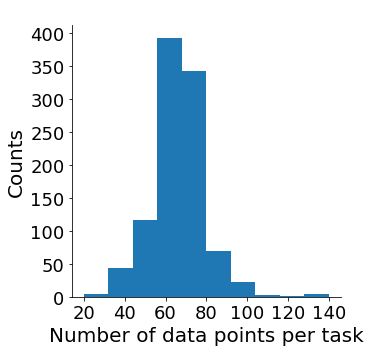

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
expected_number_points = np.array([data[data.task_id==ii].trial_id.max()+1 for ii in np.arange(data.task_id.max()+1)])
print('mean: ', expected_number_points.mean())
ax.hist(expected_number_points)
plt.legend(fontsize=FONTSIZE-2,  loc="upper center", bbox_to_anchor=(.45, 1.1), ncol=3, frameon=False)
ax.set_ylabel('Counts', fontsize=FONTSIZE)
ax.set_xlabel('Number of data points per task', fontsize=FONTSIZE) #$a_{name_trials}$
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
sns.despine()
f.tight_layout()
plt.show()

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


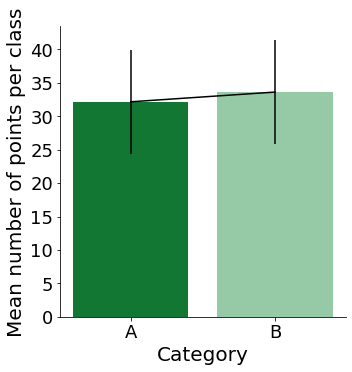

In [5]:
from plots import label_imbalance
label_imbalance(data)

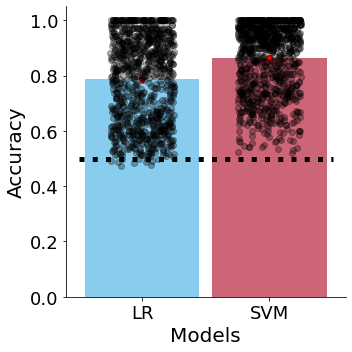

In [17]:
from plots import compare_llm_uniform_data_samples
random=False
compare_llm_uniform_data_samples(data, random)

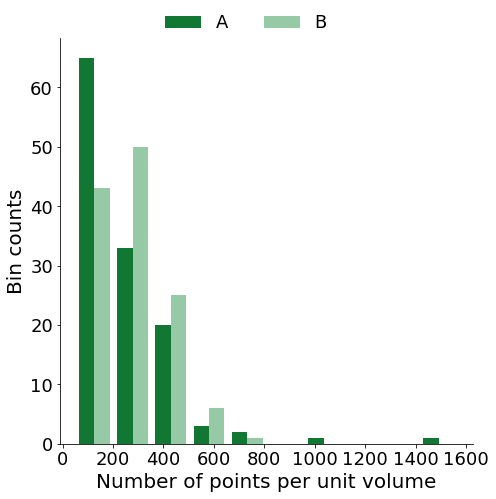

In [7]:
from plots import plot_histogram_binned_data
plot_histogram_binned_data(data, 5)

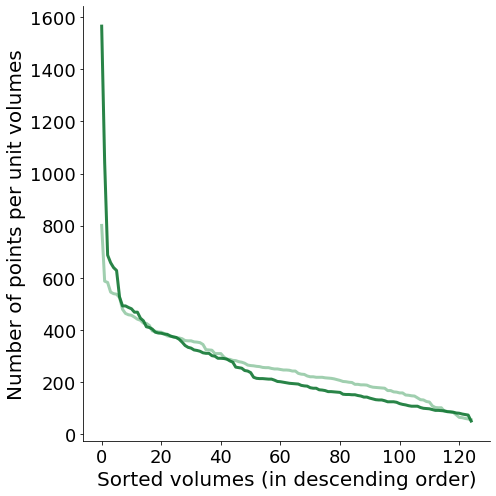

In [8]:
from plots import plot_sorted_volumes
plot_sorted_volumes(data, 5, min_value=0, max_value=1)

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization fai

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.092666
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.076296
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.082151
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.081725
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.169121
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.527003
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.501644
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.534642
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.503773
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.646520
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.563024
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.584630
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.228044
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000026
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000022
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.000018
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.145188
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.669476
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.585536
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.282974
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.270588
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.682314
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.633796
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r


         Gradient evaluations: 36
         Current function value: 0.104938
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.686135
         Iterations: 34
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.681860
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.689292
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.685772
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.171120
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.137245
         Iterations: 35
         Function e

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.165043
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.162873
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.352988
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.300135
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.304972
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.284208
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.290839
         Iterations: 31
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.668112
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.167555
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.165773
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.294110
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.284150
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.692266
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.688468
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

Optimization terminated successfully.
         Current function value: 0.404719
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.365559
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.646605
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.592907
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.631592
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.608617
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.645582
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.124631
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.033175
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.027968
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.299907
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.222177
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.436269
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.672947
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.613505
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.635600
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.550259
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.690753
         Iterations: 24
         Function evaluations: 26
         Gradient evalua

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.074945
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.038512
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.279637
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.267483
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.685807
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.624919
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 30
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.675938
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.356410
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.220415
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.667136
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.521853
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.641252
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.628329
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.327117
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.240105
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.222803
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.199810
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689807
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.668037
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.654358
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.091026
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.087828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.235378
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.200313
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.318926
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.193483
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.210986
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.201435
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.309671
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.291537
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.641114
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.295420
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.404546
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.330338
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.544523
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.368278
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000022
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.626847
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.348030
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.356591
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.521464
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.450256
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.688095
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.651105
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.683395
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.129240
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.112396
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.379774
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.376340
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.254467
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.222566
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.355859
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.255291
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.241661
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.584981
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.452226
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

Optimization terminated successfully.
         Current function value: 0.667884
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.615546
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.421468
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.016254
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.051581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.045193
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.470543
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.000048
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.539085
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.324555
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.459166
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.195260
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.121579
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.122189
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.000017
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.670739
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.634961
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.548798
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.494194
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.212875
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li


         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.032862
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.001897
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.597042
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.567405
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.687135
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.669482
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Curr

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.264772
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.098776
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.078823
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.062304
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.051911
         I

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.057122
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.034975
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.027203
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.691966
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.677002
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 24
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.292246
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.402717
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.280563
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.213210
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.216820
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.288815
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.190744
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.215000
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.474395
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.432843
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.043205
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000406
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.672601
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.665339
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.438283
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.253271
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.148567
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.135905
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000070
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.211752
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.155589
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.097357
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.080899
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.250032
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.138698
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 25
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.685258
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.444015
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.361114
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.096794
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.082976
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.664798
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.613307
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.690152
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.665561
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.653059
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.646814
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.251031
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.230876
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.685402
         Iterations: 24
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:36

         Current function value: 0.095216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.092163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000179
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.000013
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000070
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000036
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.149997
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.102012
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000024
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
         Current function value: 0.110309
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.093327
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.166132
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.549695
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.207042
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.043965
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000137
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.000064
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.609891
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.579851
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

         Current function value: 0.623613
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.117094
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.054409
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.683598
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.650813
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689231
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.642672
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.456817
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.643863
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.570417
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.375890
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.314111
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.599667
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.520427
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.460303
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.410747
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.263924
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.201929
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.315849
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.246269
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.594972
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.560618
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.279270
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.114689
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.678904
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.669305
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.669540
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.634962
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.609326
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.529177
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.571436
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.491793
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.684599
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.665805
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000006
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.416415
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.235764
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.426971
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.424361
         Iterations: 35
         Function evaluations: 37
         G

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.085576
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.461463
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.172675
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.121334
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.113744
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.076302
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.048301
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.592434
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.210524
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.182297
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000030
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000013
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.637421
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.511899
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.683500
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.655692
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.687043
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.669689
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.196377
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.173640
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.690431
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000025
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.000029
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.352620
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.341126
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.589546
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.507347
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.659496
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:18

Optimization terminated successfully.
         Current function value: 0.000044
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.006440
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.044854
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.133663
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.121995
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000018
         Iterations: 34
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.088683
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.076329
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.441297
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.362159
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.669343
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.658330
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.506928
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.003161
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.128486
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.125780
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.126677
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.139816
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.632913
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.442352
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.019213
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000515
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.691818
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.464944
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.330042
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.256671
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.083966
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.519322
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.034585
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.039919
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.268658
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.117038
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.672739
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.655914
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.524378
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.486817
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.568582
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.504019
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.068620
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.064677
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.684885
         Iterations: 23
         Function evaluations: 25
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.601412
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.648665
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.625038
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.511219
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.368479
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.578271
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.530158
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.068947
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.060878
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.606175
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.583116
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.282316
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.277443
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.212227
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.644971
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.622768
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.688460
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.644492
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.640701
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.627417
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.445978
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.681455
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.638736
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.687897
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.670427
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000016
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000022
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:36

         Current function value: 0.261309
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.241924
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.208218
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.685422
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.481617
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000009
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Gradient evaluations: 37
         Current function value: 0.000279
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.316901
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.194354
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.633850
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.533586
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.130383
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.122763
         Iterations: 35
         Function evaluations: 36
         Gradient evalua

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.627945
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.678232
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.566707
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.569892
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.326097
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.310155
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.306825
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.689856
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.671250
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000043
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000017
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.332246
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.058496
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
      

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.000029
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.593858
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.570401
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.607194
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.521884
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.171369
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.170627
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.379832
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.217402
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.209437
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000104
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000409
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.650284
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.638332
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.381275
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000016
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
         Current function value: 0.120384
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.114998
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.588779
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.666865
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.630707
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.665633
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.574732
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.108054
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.088353
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInv

Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.227321
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.073732
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.692325
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.683165
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.232063
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.568553
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.551123
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.500687
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.444011
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWa

Optimization terminated successfully.
         Current function value: 0.671348
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.612097
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000020
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
         Current function value: 0.052291
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.026211
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.300559
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.123682
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.460857
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.379312
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.521662
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.473294
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.093906
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.088140
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.265984
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.628030
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.620136
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.153577
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.155153
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.346412
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
         Current function value: 0.186622
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.358166
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.261765
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.382975
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.019131
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.059620
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.412701
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.239386
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.270455
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.234929
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000451
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000328
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.000153
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.585070
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.092148
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.087163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000008
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:36

         Current function value: 0.024214
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.283355
         Iterations: 30
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.213380
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.502668
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.496227
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.339641
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.286645
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000019
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.223087
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.205648
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.671346
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.565660
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.561427
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.432397
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.162261
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.153516
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.673392
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.604788
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.636793
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.568689
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 17
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.365528
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.301018
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689234
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.662594
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.010499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000635
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.667267
         Iterations: 23
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.425779
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.333220
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000016
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.619136
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.584184
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

         Current function value: 0.000118
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000024
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
         Current function value: 0.102693
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.101097
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.668872
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization fai

         Current function value: 0.204045
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.254750
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.226116
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.520773
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.232706
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.688330
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.654158
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.276988
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.273844
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.249482
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000041
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000008
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.623654
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.518225
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.163442
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.157682
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000032
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.347373
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.319839
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.058042
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.655877
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.610098
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.358546
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.285615
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.682108
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.681120
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.670339
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000036
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.000025
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000024
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.644023
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.594470
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimi

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

Optimization terminated successfully.
         Current function value: 0.496964
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.243696
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.229293
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.174843
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.204671
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.140589
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.565323
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.001220
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.000216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.055099
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.050260
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.682764
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.630526
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.112069
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

Optimization terminated successfully.
         Current function value: 0.590040
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.546973
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.687691
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.669960
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.032596
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.027978
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.674235
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.654908
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


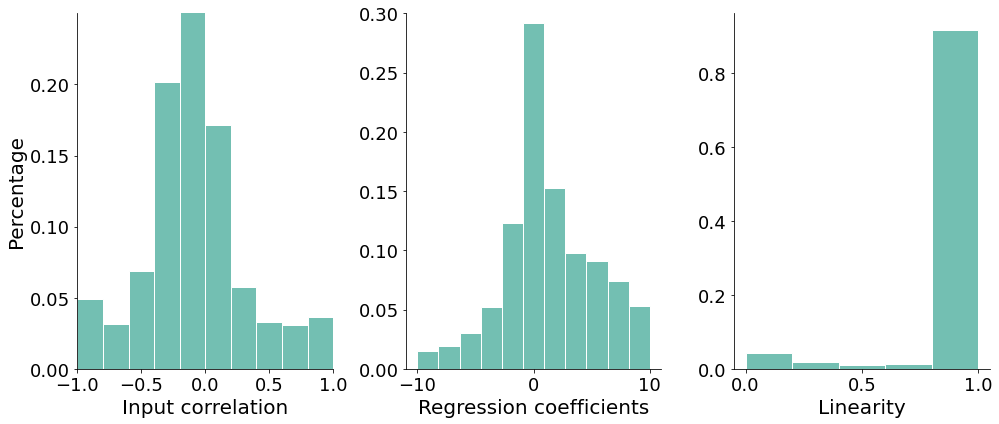

In [9]:
from plots import plot_data_stats
plot_data_stats(data)

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization fai

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.092666
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.076296
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.082151
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.081725
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.169121
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.678664
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.655092
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.660022
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

         Current function value: 0.270588
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.682314
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.633796
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.653729
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.609903
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.301759
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.257755
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.126667
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.104938
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.686135
         Iterations: 34
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.681860
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.689292
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.685772
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.171120
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.310734
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.165043
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.162873
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.352988
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.300135
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.304972
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.284208
         I

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.492519
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.676998
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.668112
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.167555
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.165773
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.294110
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.284150
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.404719
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.365559
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.646605
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.592907
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimizati

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:36

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.033175
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.027968
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.299907
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.222177
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000005
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.452667
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.436269
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.672947
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.613505
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.635600
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.550259
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.690753
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.074945
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.038512
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.279637
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.267483
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.685807
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.624919
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 30
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.675938
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.356410
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.220415
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.667136
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.521853
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.641252
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.628329
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.327117
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.240105
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.222803
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.199810
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689807
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.668037
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.654358
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.091026
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.087828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.235378
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.200313
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.318926
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.193483
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.201435
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.309671
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.291537
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.641114
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.497347
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/pyth

         Current function value: 0.077544
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.053277
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.671099
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.495744
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.300224
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.231746
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.106293
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.321844
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.306654
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.393763
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.348995
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.186593
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.148347
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.141386
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.684445
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.667371
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.177484
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.177798
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.286740
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.264525
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.688134
         Iterations: 20
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.122142
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.118155
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.677114
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.668193
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.674572
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
         Current function value: 0.592206
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.454951
         Iterations: 35
         Function evaluations: 38
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.051581
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.045193
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.470543
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.460565
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.366248
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.095357
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.238319
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.617384
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.476138
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.635179
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.524265
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.660909
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.553036
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.632344
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.494194
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.212875
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.197748
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689871
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.674051
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.692684
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.673363
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.669482
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.315067
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.248764
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.651775
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.615548
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.095142
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.092880
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.051911
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000941
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.003879
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.692682
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.691344
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.450985
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.427353
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.683030
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.630485
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.336350
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.226883
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.036169
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.001763
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.577448
         Iterations: 28
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.541413
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.641158
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.632949
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.617678
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.526657
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.612880
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.595621
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.102763
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.668340
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.633499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.640146
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.589852
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000026
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 34
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.573687
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.691396
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.685120
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.170045
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.162608
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.291630
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.213189
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.057196
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.124605
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.116030
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.589798
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.575400
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.482912
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.450214
         I

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.396731
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.380927
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.248703
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.239844
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.114968
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.116649
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.261610
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.653059
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.646814
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.251031
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.230876
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.685402
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.679247
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.236264
         Iterations: 33
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.613908
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.559395
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.459314
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:36

Optimization terminated successfully.
         Current function value: 0.666111
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.616299
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.641029
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.536028
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.666898
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.646065
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.468771
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.586231
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.522251
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.340005
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.564754
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.549695
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.207042
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.043965
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.677602
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.623613
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.117094
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.054409
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.683598
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.650813
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689231
         Iterations: 23
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.648517
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.381217
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.172376
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.634950
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.560579
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.494609
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.456817
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.652118
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.607906
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.643335
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.554047
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000010
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 30
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.238458
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.228187
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.679549
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.628905
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.263924
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.201929
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.315849
         Iterations: 33
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.678904
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.669305
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.669540
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.634962
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.601459
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.378640
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.140407
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.146861
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1810:

         Current function value: 0.692154
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.327396
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.289259
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.058592
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.043864
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.118147
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.113903
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.560240
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.427325
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.417309
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.411726
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.296621
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.588465
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.563936
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.492105
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.255537
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.238469
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.537407
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.165640
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.683500
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.655692
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.648737
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.442973
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.271007
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000025
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.000029
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.352620
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.341126
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.047342
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 34
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000044
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 0.006440
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.044854
  

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization fai

         Current function value: 0.362159
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.669343
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.658330
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.506928
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.401762
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.655433
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.487381
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.126677
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.139816
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.632913
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.442352
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.399431
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.265860
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.676596
         Iterations: 29
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.082486
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.426914
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.364190
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.329154
         Iterations: 28
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.307598
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000007
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.680867
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.655596
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.669169
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.587884
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: 0.126198
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.034142
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.011486
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.677559
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.674369
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.634664
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 32
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.066232
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.064081
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.068947
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:36

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.321291
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.311870
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.644971
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.622768
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.688460
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.644492
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.681455
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.638736
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.687897
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.670427
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000016
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.000022
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
      

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.685422
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.481617
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.190423
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.162698
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
      

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.130383
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.122763
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.620723
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.435797
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.670866
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.563099
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.418837
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.041997
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.691270
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.685314
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000021
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.654477
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.618257
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.143710
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.105686
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.352184
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.286576
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.145203
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.147255
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.138058
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.176220
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.146055
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.127677
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.220291
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.214570
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.081056
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.070270
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.000066
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000018
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.210530
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.184224
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.680779
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.628736
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 30
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.669226
         Iterations: 23
         Function evaluations: 25
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.365054
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.348723
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.227321
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.073732
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.692325
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.500687
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.444011
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.331899
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.286762
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.298250
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 0.150529
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.128150
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.673305
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.631658
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.553928
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.440002
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.562526
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.540532
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.127111
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.093188
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.298407
         Iterations: 31
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.144495
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.115067
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
         Current function value: 0.162400
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.144899
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.227077
         Iterations: 34
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.124627
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.075976
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.657894
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.586975
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.022690
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.041075
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.141683
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.677043
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.621586
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.412701
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.239386
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.585070
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.092148
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.087163
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.000008
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

Optimization terminated successfully.
         Current function value: 0.600796
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.582671
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.611092
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.427580
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.656704
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
         Current function value: 0.472383
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.218201
         Iterations: 35
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.222467
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.690088
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.652232
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.187828
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.168999
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.162261
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.153516
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated 

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.301018
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.689234
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.662594
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.010499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.000635
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.667267
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.636735
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.619136
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.584184
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.677138
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.664250
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.350422
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.197127
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.684181
         Iterations: 24
         Functio

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

Optimization terminated successfully.
         Current function value: 0.668872
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
         Current function value: 0.658367
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.481153
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.133776
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 0.314540
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: 0.289173
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.593822
  

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.267939
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.690315
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.684499
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.553667
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.405122
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.068300
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.053598
         Iterations: 35
         Function evaluations: 37
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 0.175401
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.173611
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.691801
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.666404
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.163442
         Iterations: 35
         Functi

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py

         Current function value: 0.600675
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.680242
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.594078
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.613431
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 0.521876
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.655877
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.610098
         Iterations: 35
         Functio

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Optimization terminated successfully.
         Current function value: 0.266057
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.166569
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.226563
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: 0.226461
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.000036
         Iterations: 29
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
      

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

         Current function value: 0.067146
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.250438
         Iterations: 31
         Function evaluations: 33
         Gradient evaluations: 33
         Current function value: 0.210453
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.496964
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.243696
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.229293
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.174843
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/li

         Current function value: 0.000216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.055099
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.050260
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.682764
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
         Current function value: 0.630526
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.112069
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.111655
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated 

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

         Current function value: 0.223304
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.170964
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.690661
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
         Current function value: 0.661380
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.632125
         Iterations: 25
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 0.584622
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.590016
         Iterations: 35
         Function evaluations: 36
         Gradient ev

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task['input'] = df_task['input'].apply(eval).apply(np.array)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/p

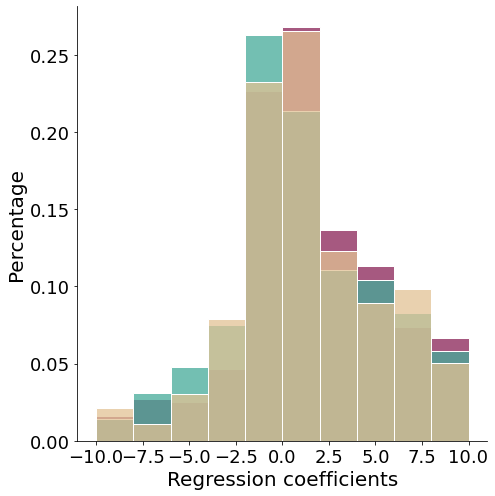

In [10]:
from plots import plot_cue_validity
plot_cue_validity(data)

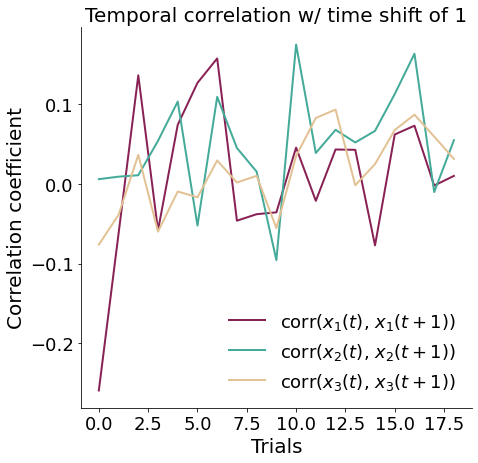

In [19]:
from plots import plot_correlation_features
plot_correlation_features(data, max_input_length=150, time_shift=1)

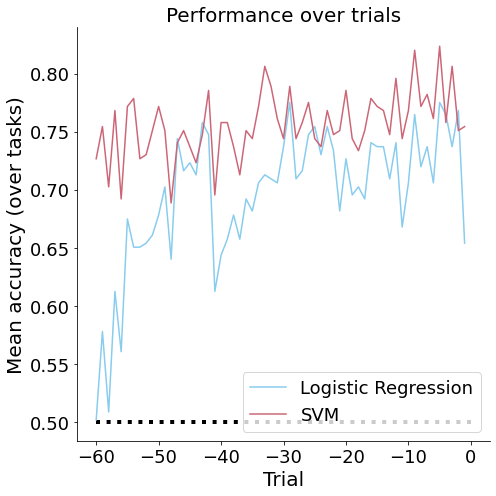

In [7]:
from plots import plot_trial_by_trial_performance
min_trials = 70
df = data.groupby('task_id').filter(lambda x: len(x) > min_trials)
plot_trial_by_trial_performance(df, 10, 60, min_trials)

/raven/u/ajagadish/vanilla-llama/categorisation/plots.py:264: RuntimeWarning: Mean of empty slice
  dists, probs = np.nanmean(distances,0), np.nanmean(probabilities, 0)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


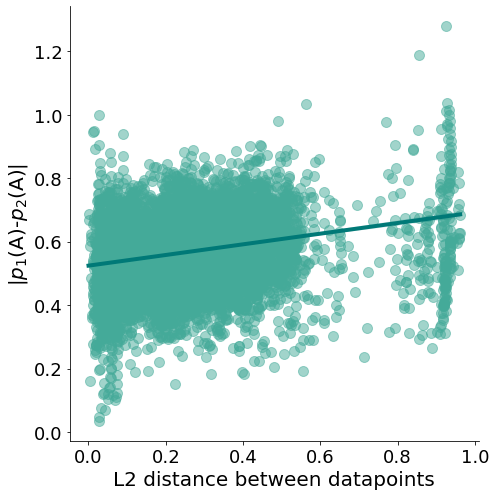

In [18]:
from plots import plot_probability_same_class_versus_distance
plot_probability_same_class_versus_distance(data)